In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Loading Data
healthcare_data = pd.read_csv('/content/drive/MyDrive/Deep Learning and NN/healthcare_dataset.csv')

In [5]:
healthcare_data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [7]:
healthcare_data.isnull().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


In [8]:
healthcare_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [9]:
healthcare_data.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


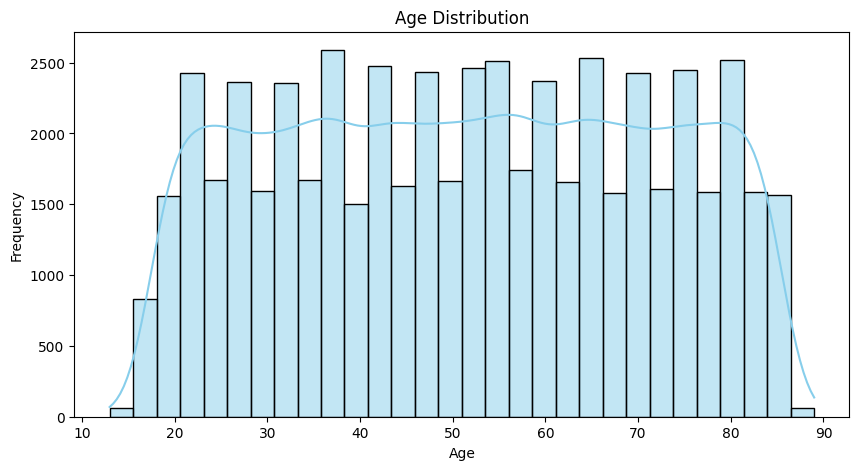

In [10]:
# Convert date columns to datetime format for analysis
healthcare_data['Date of Admission'] = pd.to_datetime(healthcare_data['Date of Admission'], errors='coerce')
healthcare_data['Discharge Date'] = pd.to_datetime(healthcare_data['Discharge Date'], errors='coerce')

# 1. Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(healthcare_data['Age'], kde=True, color="skyblue", bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

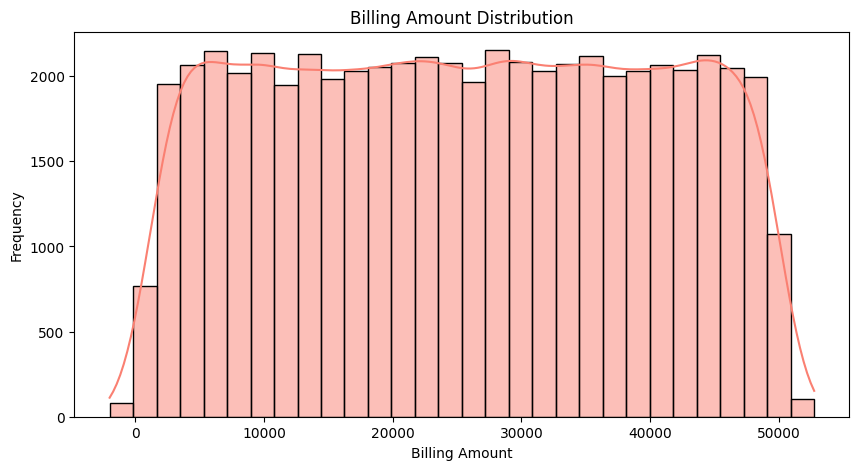

In [11]:
# 2. Billing Amount Distribution (checking for negative values)
plt.figure(figsize=(10, 5))
sns.histplot(healthcare_data['Billing Amount'], kde=True, color="salmon", bins=30)
plt.title("Billing Amount Distribution")
plt.xlabel("Billing Amount")
plt.ylabel("Frequency")
plt.show()


<ipython-input-12-6f20e7d15d7a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Admission Type', data=healthcare_data, palette="viridis")


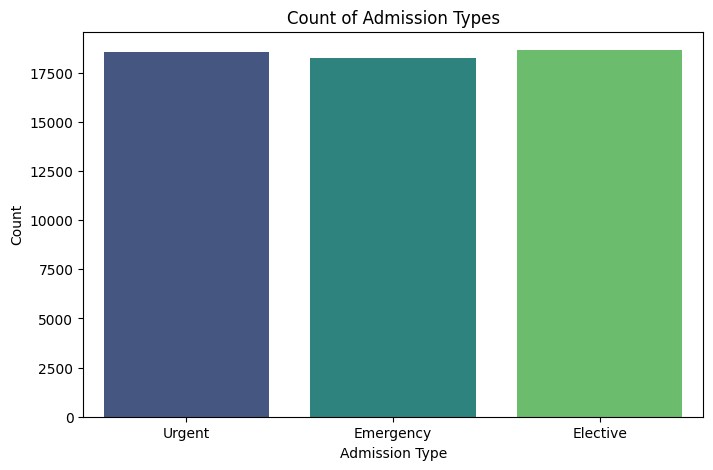

In [12]:
# Countplot for Admission Type to understand common admission types
plt.figure(figsize=(8, 5))
sns.countplot(x='Admission Type', data=healthcare_data, palette="viridis")
plt.title("Count of Admission Types")
plt.xlabel("Admission Type")
plt.ylabel("Count")
plt.show()


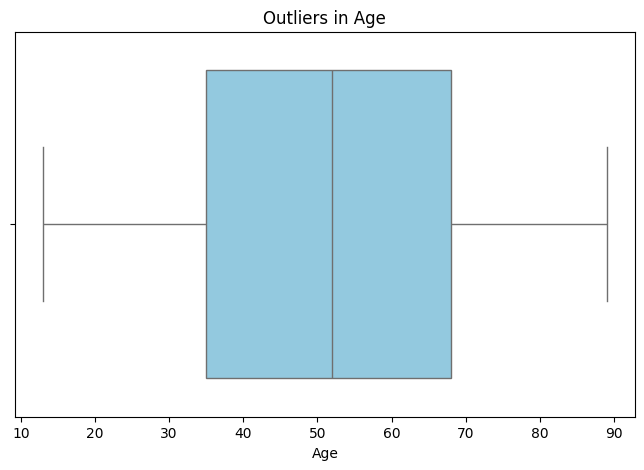

In [15]:
#Outliers in Age
plt.figure(figsize=(8, 5))
sns.boxplot(x=healthcare_data['Age'], color="skyblue")
plt.title("Outliers in Age")
plt.xlabel("Age")
plt.show()

In [16]:
# Calculate the mean age for each medical condition to see if older ages align with specific conditions
condition_age = healthcare_data.groupby('Medical Condition')['Age'].mean().reset_index()

In [17]:
# Sort conditions by mean age in descending order for clearer visualization
condition_age = condition_age.sort_values(by='Age', ascending=False)


<ipython-input-18-ce2fe77b20a9>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=condition_age, x='Age', y='Medical Condition', palette="coolwarm")


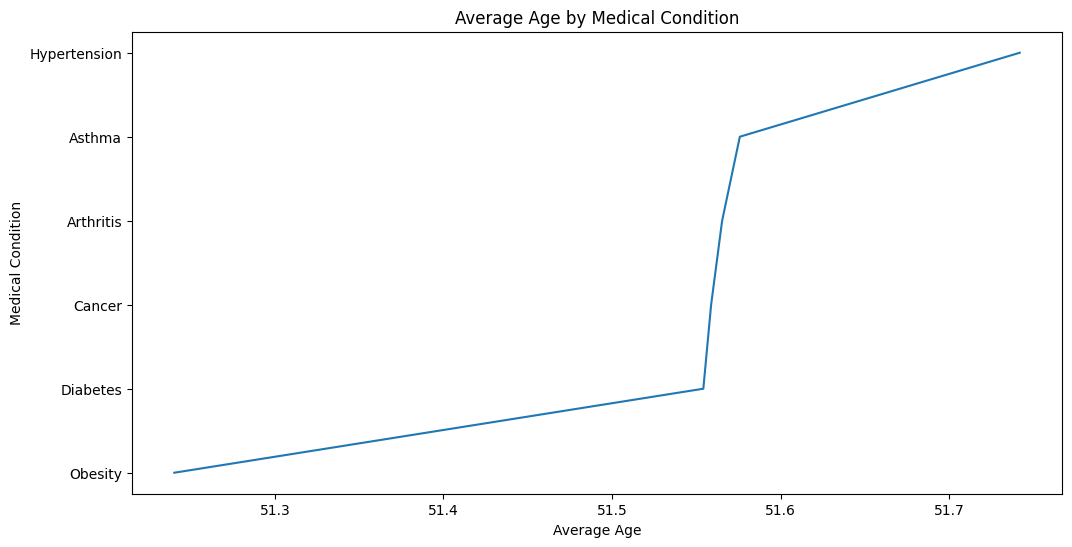

In [18]:
# Plotting the relationship between Age and Medical Condition
plt.figure(figsize=(12, 6))
sns.lineplot(data=condition_age, x='Age', y='Medical Condition', palette="coolwarm")
plt.title("Average Age by Medical Condition")
plt.xlabel("Average Age")
plt.ylabel("Medical Condition")
plt.show()

<ipython-input-19-e74d2c08168b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Medical Condition', data=healthcare_data, palette="viridis")


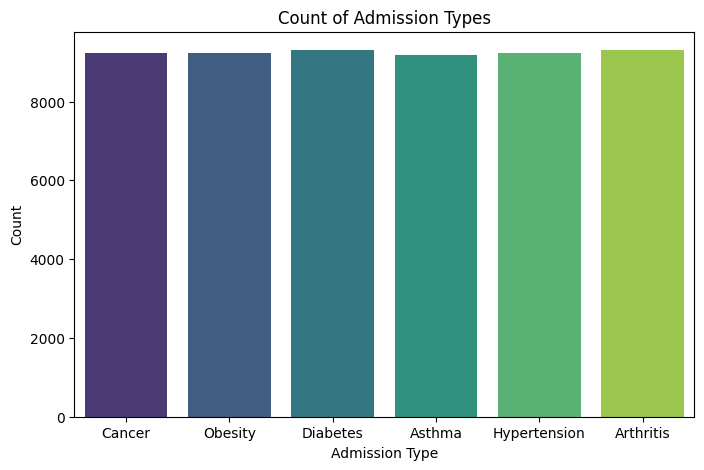

In [19]:
# Countplot for Admission Type to understand common admission types
plt.figure(figsize=(8, 5))
sns.countplot(x='Medical Condition', data=healthcare_data, palette="viridis")
plt.title("Count of Admission Types")
plt.xlabel("Admission Type")
plt.ylabel("Count")
plt.show()


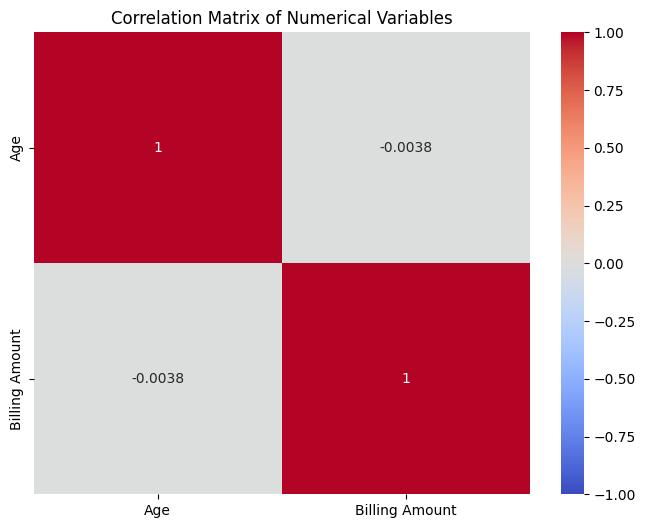

In [20]:
# Calculate and visualize the correlation matrix for numerical variables
plt.figure(figsize=(8, 6))
sns.heatmap(healthcare_data[['Age', 'Billing Amount']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

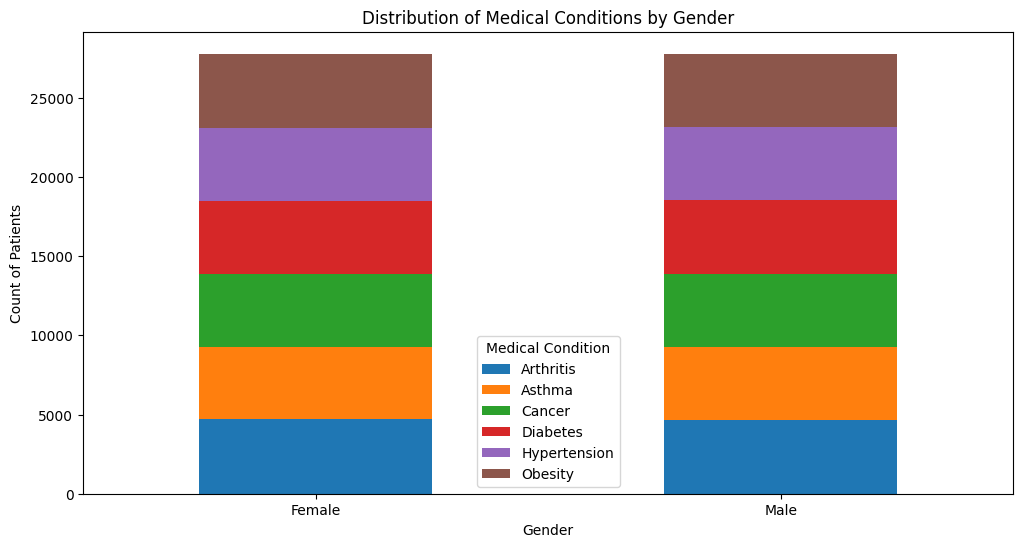

In [21]:
# Plotting: Gender vs. Medical Condition
plt.figure(figsize=(12, 6))
gender_condition_counts = healthcare_data.groupby(['Gender', 'Medical Condition']).size().unstack().fillna(0)
gender_condition_counts.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title("Distribution of Medical Conditions by Gender")
plt.ylabel("Count of Patients")
plt.xlabel("Gender")
plt.legend(title="Medical Condition")
plt.xticks(rotation=0)
plt.show()

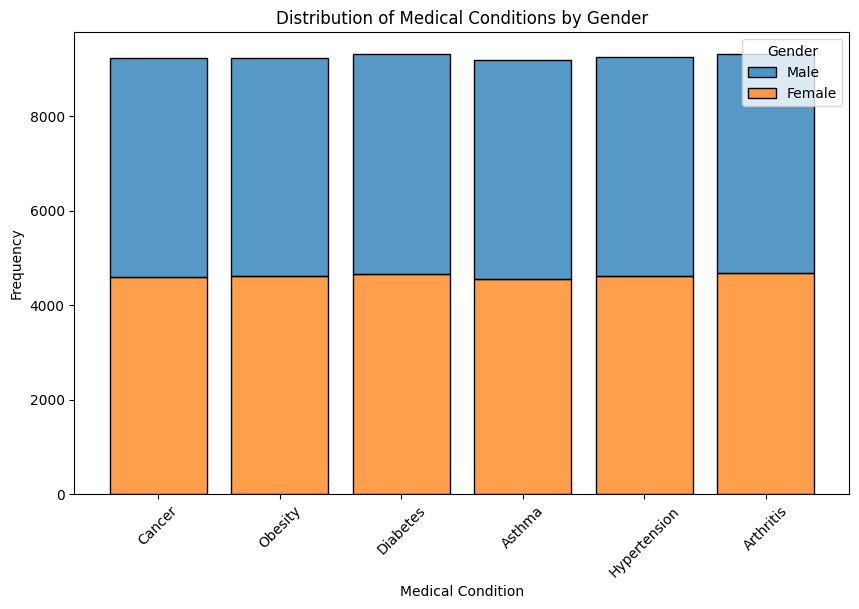

In [22]:
# Histogram: Gender vs. Medical Condition
plt.figure(figsize=(10, 6))
sns.histplot(data=healthcare_data, x='Medical Condition', hue='Gender', multiple="stack", shrink=0.8)
plt.title("Distribution of Medical Conditions by Gender")
plt.xlabel("Medical Condition")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()